In [1]:
import pandas as pd
import numpy as np

importing the data

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.dropna()
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
x=data["review"]
y=data["sentiment"]
x,y

(0        One of the other reviewers has mentioned that ...
 1        A wonderful little production. <br /><br />The...
 2        I thought this was a wonderful way to spend ti...
 3        Basically there's a family where a little boy ...
 4        Petter Mattei's "Love in the Time of Money" is...
                                ...                        
 70011    I thought this movie did a down right good job...
 70012    Bad plot, bad dialogue, bad acting, idiotic di...
 70013    I am a Catholic taught in parochial elementary...
 70014    I'm going to have to disagree with the previou...
 70015    No one expects the Star Trek movies to be high...
 Name: review, Length: 70016, dtype: object,
 0        positive
 1        positive
 2        positive
 3        negative
 4        positive
            ...   
 70011    positive
 70012    negative
 70013    negative
 70014    negative
 70015    negative
 Name: sentiment, Length: 70016, dtype: object)

splitting the data


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train ,y_test = train_test_split(x,y,train_size=0.8,random_state=2)
X_train,y_train

(946      I first remember bumping into this zaniness fr...
 56108    This is a very visual film. By that I mean tha...
 48728    If there's one cartoon that helped to put UPA ...
 65495    This film (along with Rinne) are minor gems am...
 42527    I watched this as part of a vampire movie mara...
                                ...                        
 53922    AristoCats is such a terrific Disney classic t...
 44295    Let this film serve as the death knell to the ...
 33867    This show is not clever. That's basically what...
 31019    **Possible Spoiler*** Adam Sandler is usually ...
 44566    This film seems well made, and more efforts sh...
 Name: review, Length: 56012, dtype: object,
 946      positive
 56108    positive
 48728    positive
 65495    negative
 42527    negative
            ...   
 53922    positive
 44295    negative
 33867    negative
 31019    positive
 44566    negative
 Name: sentiment, Length: 56012, dtype: object)

In [5]:
from nltk.tokenize import RegexpTokenizer
#for tokexizing the data into
# "my name is"  => ["my","name","is"]

In [6]:
from nltk.stem.porter import PorterStemmer
#cleaning the data like "liking " -> "like"

In [7]:
from nltk.corpus import  stopwords
# to remove the unwanted data like the is

In [8]:
import nltk
nltk.download('stopwords')
# Downloading the stopwords

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [9]:
#tokenizer with spaceblank
tokenizer = RegexpTokenizer(r"\w+")

en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

this function cleans the data

In [10]:
def getCleanedText(text):
  text = text.lower()
  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

In [11]:
text = "it is good movie"
getCleanedText(text)


'good movi'

Cleaning the X_train and x_test

In [12]:
# for i in X_train:
#     print(getCleanedText(i))

#X_train cleaning
X_clean = [getCleanedText(i) for i in X_train]
X_clean


['first rememb bump zani zucker brother jim abraham back earli day comedi central back day 90 program consist benni hill rerun origin mst3k complet beard host br br capt frank drebin play stone face dead pan filibust lesli nielson process creat first amalgam variou stereotyp polic televis show protagonist think dragnet meet starski hutch show boil flask full well known polic televis show plot scenario distil 3 time produc pure policeman everi made forget simon pegg hot fuzz save later frank drebin clueless time terribl driver terribl shot macho yet sensit vulner master polic investig methodolog k ask johnni leatheri old shoe shine boy make bad cop cop get lucki also capt drebin notic captain perfect along partner nordberg rest forc perfectli parodi polic drama cours 6 golden episod br br show treasur trove hilari dialog quotabl quot abl sight gag bit date silli magic never came sight gag howev core nonsens straight face convers activ foreground crazi thing occur background movi best de

In [13]:
#Y_train cleaning
xt_clean = [getCleanedText(i) for i in X_test]
xt_clean

['least half dozen silent film version shakespear merchant venic sever televis product one ever gotten around make big budget theatric featur play given natur play memor charact shylock nasti jew good guess littl unpleas transpir europ late 1930 1940 may dampen filmmak enthusiasm sure main motiv michael radford new film provid al pacino chanc shout bray brood mutter torment quit good like richard iii role shylock sceneri chewer dream ridicul call shakespear anti semit sinc never met jew jew ban england 300 year time decad death unlik ever travel abroad level jew might well mytholog race shakespear may anti semit play certainli pacino give shylock strang accent probabl meant suggest slightest hint yiddish unfortun result 16th centuri moneylend unmistak diction cadenc fozzi bear radford version begin crawl wretch terat jew spot antonio jeremi iron gratuiti spit shylock pacino realli stand around mind busi buy come dvd sure sarg booker',
 'great movi whole famili think mani peopl seen cau

Vectorizing the data to array(numbers)
X_train datas

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_clean)
#X_vec = X_vec
X_vec

<56012x65378 sparse matrix of type '<class 'numpy.int64'>'
	with 5261650 stored elements in Compressed Sparse Row format>

In [15]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names:",  feature_names)

Feature names: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']


Vectorizing the X_test data

In [16]:
Xt_vect = vectorizer.transform(xt_clean)
Xt_vect

<14004x65378 sparse matrix of type '<class 'numpy.int64'>'
	with 1318670 stored elements in Compressed Sparse Row format>

Model buildling

In [17]:
y_train

946      positive
56108    positive
48728    positive
65495    negative
42527    negative
           ...   
53922    positive
44295    negative
33867    negative
31019    positive
44566    negative
Name: sentiment, Length: 56012, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_encoded = y_train_encoded.reshape(-1,1)
y_train_encoded

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [19]:
y_test_encoded = le.fit_transform(y_test)
y_test_encoded=y_test_encoded.reshape(-1,1)
y_test_encoded

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [20]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_vec,y_train_encoded)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = reg.predict(Xt_vect)

In [22]:
cmp = pd.DataFrame(y_test_encoded)
cmp["predict"] = y_pred
cmp

,0,predict
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
13999,1,1
14000,1,1
14001,0,0
14002,0,0


In [23]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,precision_score
print(accuracy_score(y_test_encoded,y_pred),mean_squared_error(y_test_encoded,y_pred),r2_score(y_test_encoded,y_pred),precision_score(y_test_encoded,y_pred))


0.9225221365324193 0.07747786346758069 0.6900593145556262 0.918084345961401


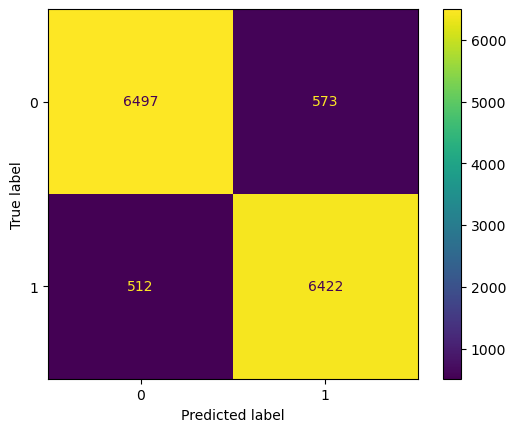

In [24]:
import matplotlib.pyplot as mp
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_encoded,y_pred)
cm_disp=ConfusionMatrixDisplay(cm)
cm_disp.plot()


In [25]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [26]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [27]:
y_predt = mn.predict(Xt_vect)
y_predt

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

In [28]:
accuracy_score(y_predt,y_test)

0.8753213367609255

In [29]:
import joblib
joblib.dump(reg,"sentiment_analysis_model")


['sentiment_analysis_model']

In [30]:
import gradio as gr
import pandas as pd

def greet(review):
    model=joblib.load("sentiment_analysis_model")
    re= getCleanedText(review)
    re = np.array([re])
    rev = vectorizer.transform(re).toarray()
    pred=model.predict(rev)
    if pred == 1:
        return "positive"
    elif pred == 0:
        return "negative"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()  

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
